# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market


### Importing Libraries


In [2]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns

## Extra
import warnings
warnings.filterwarnings(action="ignore")

### Loading dataset and Sanity check


In [3]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.shape,data.drop_duplicates().shape

((730, 16), (730, 16))

Total number of rows = 730, <br>
number of NULL value are 0, <br>
No duplicate rows

### Exploratory Data Analysis


In [8]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- Target variable is --> cnt
- Since 'cnt is sum of 'Casual, Registered', We are dropping these for better analysis


In [9]:
data.drop(["casual", "registered"],axis=1, inplace = True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
## creating numeric and categorical variable
other = ['instant', 'dteday']
num_var = [ 'temp', 'atemp', 'hum', 'windspeed', ]
catg_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_var = ['cnt']


##### Labeling Categorical Variable with more than 2 levels

In [11]:
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['mnth'] = data['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
data['weekday'] = data['weekday'].map({0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'})
data['weathersit'] = data['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [12]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,jan,0,tue,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,jan,0,wed,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,jan,0,thu,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,jan,0,fri,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,jan,0,sat,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Univariate Analysis

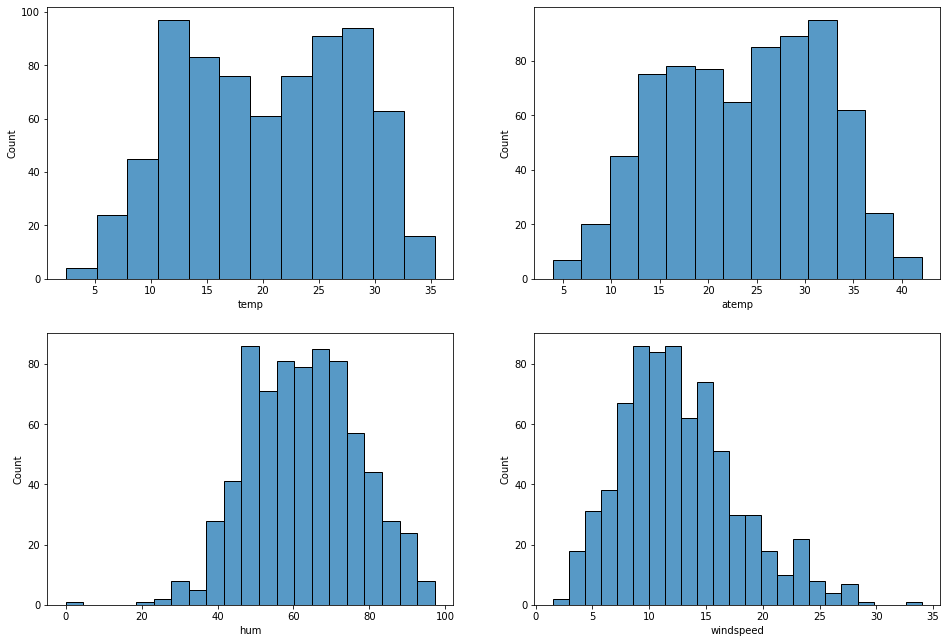

In [13]:
#for numeric data
plt.figure(figsize = (16,11))
for i in range(0, len(num_var)):
    plt.subplot(2,2,i+1)
    sns.histplot(data[num_var[i]])
plt.show()

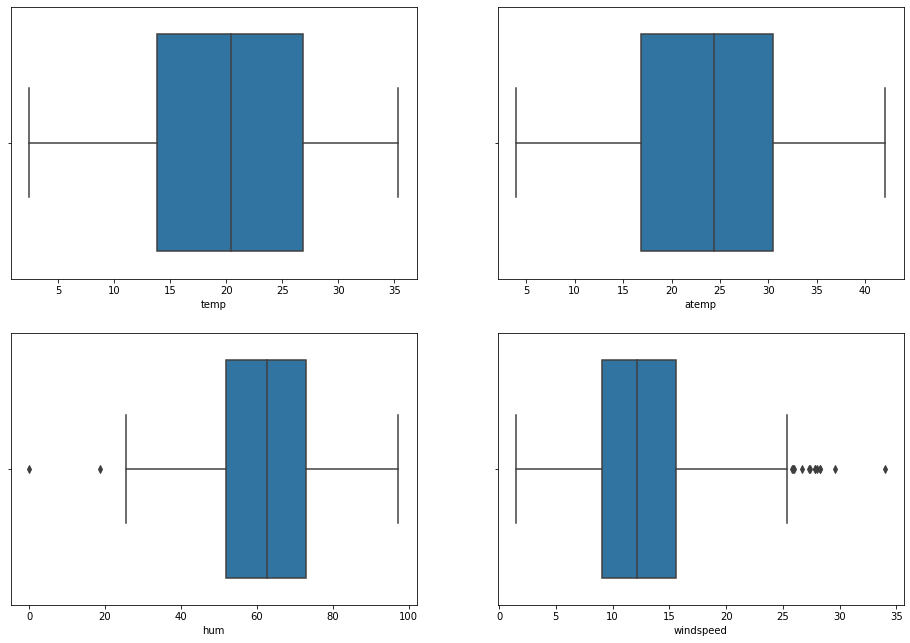

In [14]:

plt.figure(figsize = (16,11))
for i in range(0, len(num_var)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[num_var[i]])
plt.show()

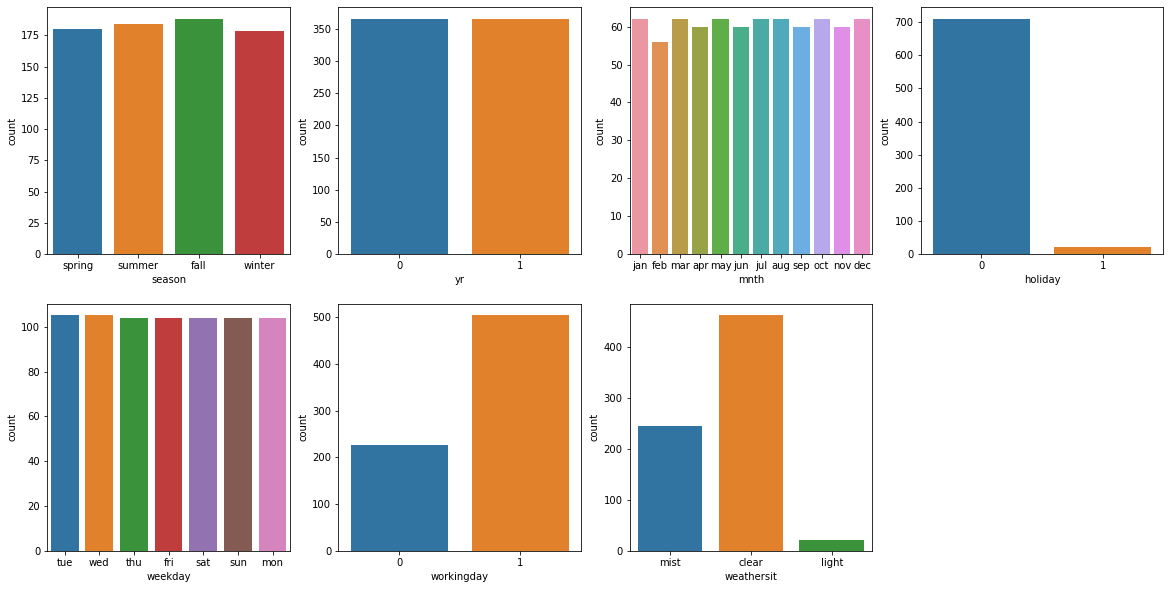

In [15]:
#for categoriacal data
plt.figure(figsize = (20,10))
for i in range(0, len(catg_var)):
    plt.subplot(2,4,i+1)
    sns.countplot(data[catg_var[i]])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

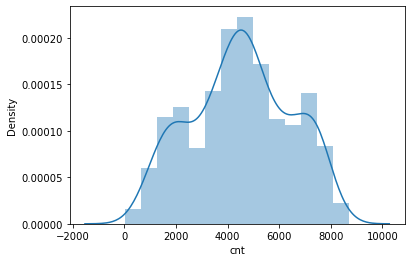

In [16]:
sns.distplot(data['cnt'])
plt.show

#### Bivariate Analysis

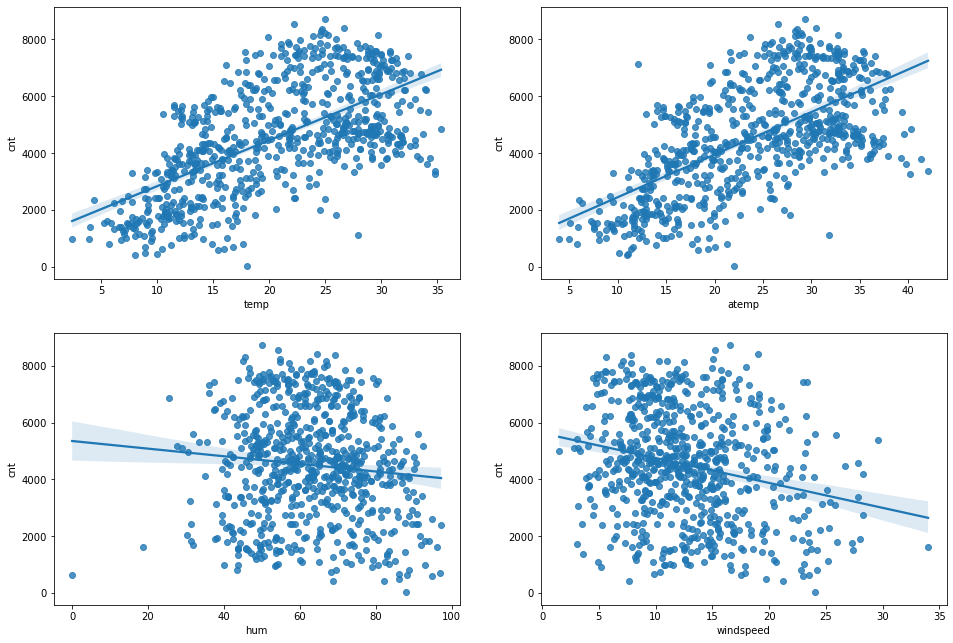

In [17]:
plt.figure(figsize = (16,11))
for i in range(0, len(num_var)):
    plt.subplot(2,2,i+1)
    sns.regplot(data[num_var[i]], data['cnt'])
plt.show()

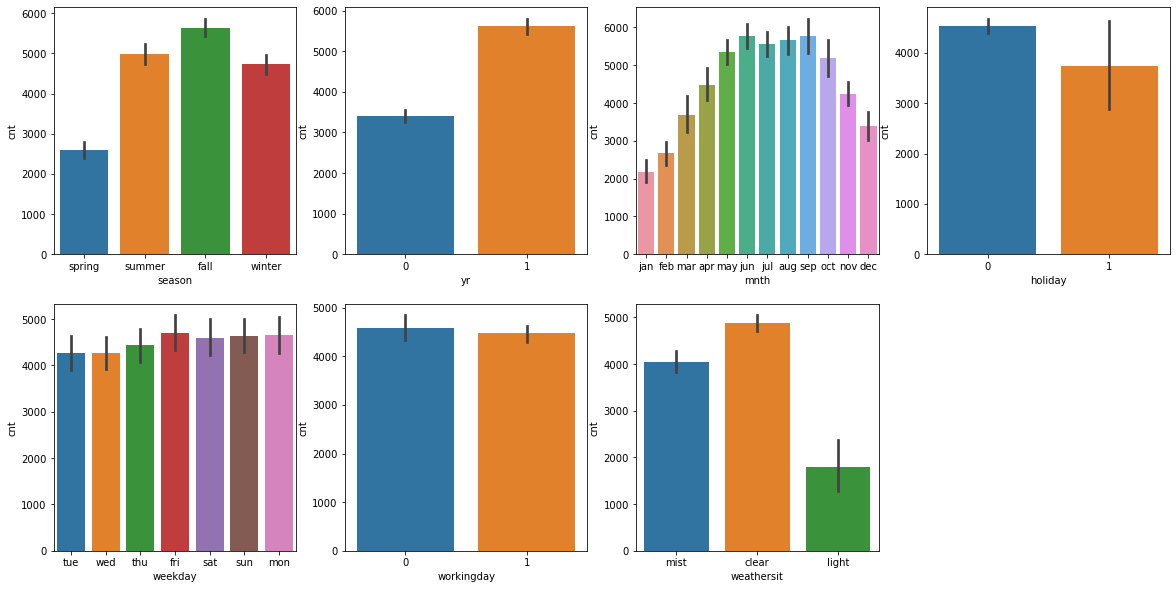

In [18]:
plt.figure(figsize = (20,10))
for i in range(0, len(catg_var)):
    plt.subplot(2,4,i+1)
    sns.barplot(data[catg_var[i]], data['cnt'])
plt.show()

##### EDA observations
- Bikes were rented more in Fall season
- Bikes were rented on days when it was  Clear, Few clouds, Partly cloudy, Partly cloudy
- Bikes were rented slightlty more on working day
- company gain its popularity in 2019 in comparision to 2018
- July to September, bike rental were high
- Friday to Monday rentals number were higher
- bike rentals were higher for both high temp and "feel-like" temp

### Visualizing the Relationship amoung variable

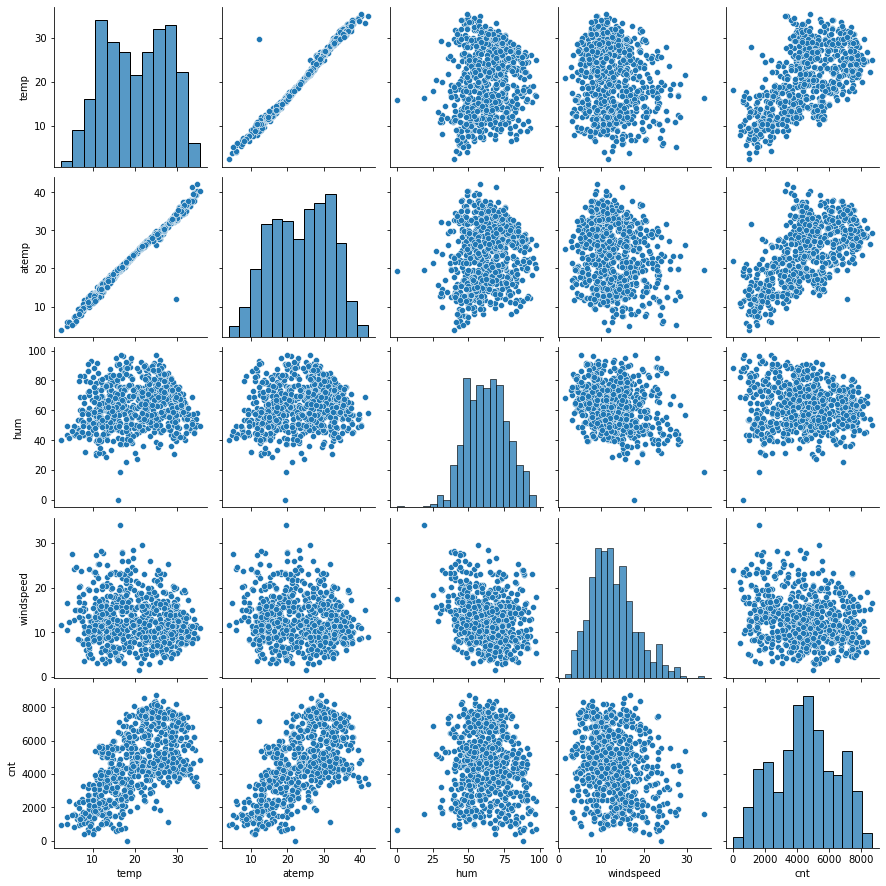

In [19]:
sns.pairplot(data[num_var + target_var])
plt.show()

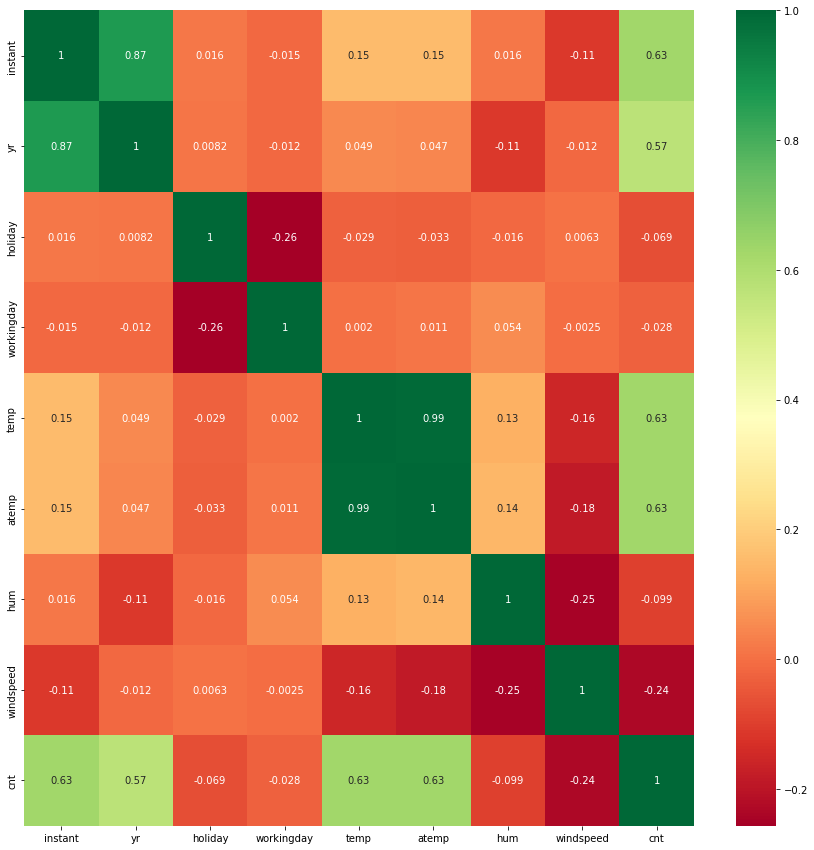

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = "RdYlGn", annot = True)
plt.show()

- column 'atemp' and 'temp are highly corelated. This is a violation of 'Assumption of Linear Regression'.
So we will drop 'atemp' column
- There is a positive correlation between temp and cnt and slight negative correlation in hum and windspeed.
- Dropping instant and dteday since it is insignificant to our evaluation

In [21]:
data.drop(['atemp'],axis=1, inplace = True)
data.drop(['instant'],axis=1, inplace = True)
data.drop(['dteday'],axis=1, inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,tue,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,wed,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,thu,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,fri,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,sat,1,clear,9.305237,43.6957,12.522300,1600


### Creation of Dummy Variable for categorical Variable

In [22]:
# list of categorical variables are 
print(catg_var)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [23]:
#Unique variable in each variable
data[catg_var].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [24]:
# for column yr, holiday and workingday -> No need to create dummy variable
# Creating dummy variable for other variable
dum1=pd.get_dummies(data["season"],drop_first=True)
dum2 = pd.get_dummies(data["mnth"],drop_first=True)
dum3 = pd.get_dummies(data["weekday"],drop_first=True)
dum4 = pd.get_dummies(data["weathersit"],drop_first=True)


In [25]:
#concate dummy variable to data
data = pd.concat([data,dum1, dum2, dum3, dum4],axis=1)

In [26]:
#drop orginal columns for which dummy variable have been created
data.drop(["season", "mnth", "weekday", "weathersit"],axis=1, inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

In [28]:
data.shape

(730, 29)

### Data Preparation Step

In [84]:
# creating x and y dataframes
X=data.drop(["cnt"],axis=1)
y=data["cnt"]

In [85]:
#create train-test dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=100)

In [86]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((511, 28), (219, 28), (511,), (219,))

### Scaling of data


In [87]:
xtrain=(xtrain-xtrain.mean())/xtrain.std()
xtest=(xtest-xtest.mean())/xtest.std()

### Model Building
#### Feature Selection
- For model building, we will start with RFE using 15 variable and go on from there

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=13)
selector=selector.fit(xtrain,ytrain)
selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [89]:
selected_cols=[]
for i,j in zip(selector.support_,xtrain):
    print(i,j)
    if i==True:
        selected_cols.append(j)

True yr
True holiday
False workingday
True temp
True hum
True windspeed
True spring
True summer
True winter
False aug
False dec
False feb
True jan
True jul
False jun
False mar
False may
False nov
False oct
True sep
False mon
False sat
False sun
False thu
False tue
False wed
True light
True mist


In [90]:
#reducing train anf test set to the present model
xtrain=xtrain[selected_cols]
xtest=xtest[selected_cols]

In [91]:
#add constant to both train and test set
import statsmodels.api as sm
xtrain=sm.add_constant(xtrain)
xtest=sm.add_constant(xtest)

In [92]:
model1=sm.OLS(ytrain,xtrain)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.94e-190
Time:                        21:55:19   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.676    129.520      0.000    4423.173    4559.434
yr          1002.8824     35.334     28.383      0.000     933.459    1072.306
holiday     -132.5535     34.999     -3.787      0.000    -201.318     -63.789
temp        1007.0518     68.416     14.720      0.000     872.632    1141.471
hum         -214.2042     47.877     -4.474      0.000    -308.270    -120.139
windspeed   -276.4057     38.146     -7.246      0.000    -351.352    -201.459
spring      -192.2241     78.279     -2.456      0.014    -346.023     -38.425
summer       188.7624     56.505      3.341      0.001      77.744     299.780
winter       351.0399     65.845      5.331      0.000     221.670     480.409
jan          -81.6535     43.456     -1.879      0.061    -167.033       3.726
jul         -129.1018     42.339     -3.049      0.002    -212.288     -45.915
sep          195.0141     39.525      4.934      0.000     117.357     272.672
light       -351.8955     38.726     -9.087      0.000    -427.981    -275.809
mist        -218.6649     43.325     -5.047      0.000    -303.788    -133.541
==============================================================================
Omnibus:                       58.698   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.688
Skew:                          -0.627   Prob(JB):                     2.54e-29
Kurtosis:                       5.148   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Since p-value of jan is greater than 5% droping the column

In [93]:
xtrain=xtrain.drop(["jan"],axis=1)
xtest=xtest.drop(["jan"],axis=1)

In [94]:
model2=sm.OLS(ytrain,xtrain)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.12e-190
Time:                        21:55:24   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.764    129.193      0.000    4423.000    4559.606
yr           999.7044     35.383     28.253      0.000     930.185    1069.224
holiday     -133.3634     35.085     -3.801      0.000    -202.297     -64.430
temp        1041.0601     66.146     15.739      0.000     911.101    1171.019
hum         -219.8842     47.902     -4.590      0.000    -314.000    -125.769
windspeed   -268.7885     38.026     -7.069      0.000    -343.499    -194.078
spring      -208.8575     77.974     -2.679      0.008    -362.057     -55.658
summer       199.4713     56.359      3.539      0.000      88.740     310.203
winter       372.3574     65.025      5.726      0.000     244.600     500.115
jul         -132.8275     42.400     -3.133      0.002    -216.133     -49.522
sep          196.3267     39.620      4.955      0.000     118.485     274.169
light       -348.5247     38.782     -8.987      0.000    -424.722    -272.328
mist        -218.8769     43.435     -5.039      0.000    -304.216    -133.538
==============================================================================
Omnibus:                       57.563   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.018
Skew:                          -0.613   Prob(JB):                     5.85e-29
Kurtosis:                       5.145   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### P value are acceptable, now lets check  VIF


In [95]:
#pvalue id acceptable for all variable, now checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.033904
2,holiday,1.016544
3,temp,3.613116
4,hum,1.894931
5,windspeed,1.194090
6,spring,5.020919
7,summer,2.623085
8,winter,3.491745
9,jul,1.484626


##### For Spring VIF is more than 5 hence removing the variable and training the dataset again

In [96]:
xtrain=xtrain.drop(["spring"],axis=1)
xtest=xtest.drop(["spring"],axis=1)


In [100]:
model3=sm.OLS(ytrain,xtrain)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.46e-190
Time:                        21:56:42   Log-Likelihood:                -4128.9
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     499   BIC:                             8333.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.979    128.401      0.000    4422.579    4560.027
yr           993.6004     35.528     27.967      0.000     923.798    1063.403
holiday     -136.1135     35.286     -3.857      0.000    -205.442     -66.785
temp        1173.2963     44.294     26.489      0.000    1086.271    1260.322
hum         -234.3814     47.889     -4.894      0.000    -328.471    -140.292
windspeed   -279.4653     38.050     -7.345      0.000    -354.222    -204.708
summer       305.4597     40.380      7.565      0.000     226.123     384.796
winter       510.7749     39.713     12.862      0.000     432.750     588.799
jul         -111.1651     41.879     -2.654      0.008    -193.445     -28.885
sep          226.6800     38.199      5.934      0.000     151.630     301.730
light       -341.0854     38.921     -8.763      0.000    -417.555    -264.616
mist        -208.7442     43.537     -4.795      0.000    -294.283    -123.206
==============================================================================
Omnibus:                       52.426   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.960
Skew:                          -0.601   Prob(JB):                     1.62e-23
Kurtosis:                       4.867   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#pvalue id acceptable for all variable, now checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.029615
2,holiday,1.015674
3,temp,1.600395
4,hum,1.870741
5,windspeed,1.180969
6,summer,1.330081
7,winter,1.286457
8,jul,1.430613
9,sep,1.190232


## Residual Analysis of the train data


In [115]:
ytrain_pred = result3.predict(xtrain)

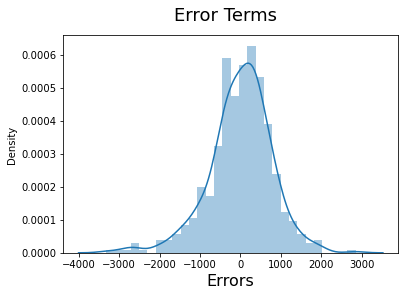

In [108]:
fig = plt.figure()    
sns.distplot((ytrain - ytrain_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)  
plt.show()

##### Error terms are normally distributed.
### Model evaluation on Test set
Since we have already created xtest along with making predictions, and added constant. Lets start with predicting data on xtest

In [109]:
ytest_pred = result3.predict(xtest)

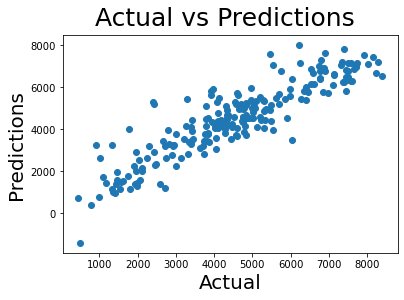

In [111]:
# Plotting ytest and ytest_pred.
fig = plt.figure()
plt.scatter(ytest,ytest_pred)
fig.suptitle('Actual vs Predictions', fontsize=25)           
plt.xlabel('Actual', fontsize=20)                 
plt.ylabel('Predictions', fontsize=20) 
plt.show()

In [112]:
# lets calsulate Rsquare
from sklearn.metrics import r2_score
r2_score(ytest, ytest_pred)

0.8028965533205452

### Analysis on the problem:
- We can see that temperature variable is having the highest coefficient 1173.2963, which means if the temperature increases by one unit the number of bike rentals increases by 1173.2963 units.
- A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

### Business Suggestion:
- Temperature could be a major factor for making decision.
- We can see demand for bikes were more in 2019 than 2018
- Holidays have negative trend, so Organisation should focus on working people.